In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'../Data/DailyFailureWeather_5_15.csv')

In [3]:
df.head()

,Date,Failure.Rate,Temp,Cloud,Disc,Humidity,MaxTemp,MinTemp,Pressure,Rain,...,Rain-3,Rain-4,Rain-5,Rain2,Temp7,Humidity7,Rain7,Rain3,Temp2,Humidity2
0,1/1/2016,0.000000,24.1,4,Sunny,57,28,22,1018,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/2/2016,0.000000,25.0,4,Sunny,63,28,22,1017,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.55,60.0
2,1/3/2016,0.055556,21.0,32,Moderate or heavy rain shower,65,23,20,1017,7.9,...,NaN,NaN,NaN,7.9,NaN,NaN,NaN,7.9,23.00,64.0
3,1/4/2016,0.111111,19.6,27,Patchy rain possible,63,23,19,1018,0.0,...,0.0,NaN,NaN,7.9,NaN,NaN,NaN,7.9,20.30,64.0
4,1/5/2016,0.055556,19.6,19,Partly cloudy,55,23,20,1019,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,7.9,19.60,59.0


In [4]:
dfR=df[df['Rain']>0]

In [5]:
NWD=dfR.Rain

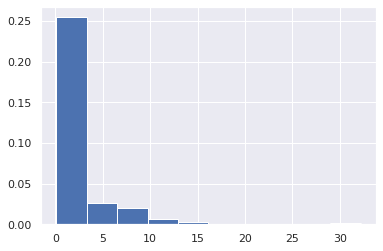

In [6]:
hist = plt.hist(NWD, density=True)

In [7]:
Rain =dfR.groupby(['Rain'])['Failure.Rate'].agg('sum')

In [8]:
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)

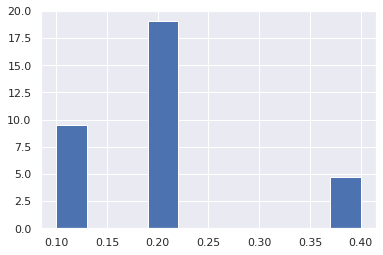

In [9]:
hist = plt.hist(FWD, density=True)

In [10]:
x_d = np.linspace(0, 40, 10000)


/tmp/ipykernel_14140/1067647443.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


0.4358863291600443

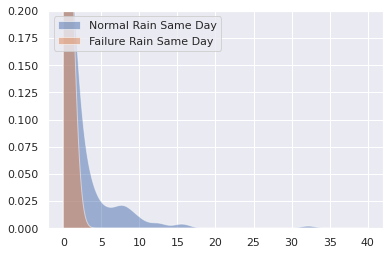

In [11]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain Same Day')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain Same Day')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.2)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])

/tmp/ipykernel_14140/2547434703.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


0.502552378910337

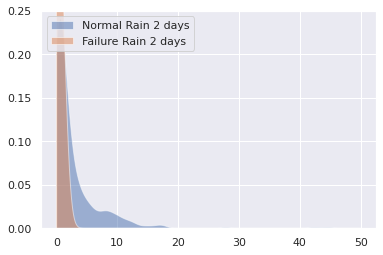

In [12]:
##############
### 2 days ###
##############
dfR=df[df['Rain2']>0]
NWD=dfR['Rain2'].dropna()
Rain =dfR.groupby(['Rain2'])['Failure.Rate'].agg('sum')
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(0, 50, 10000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain 2 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain 2 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.25)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])

In [13]:
FWD.shape[0]

11

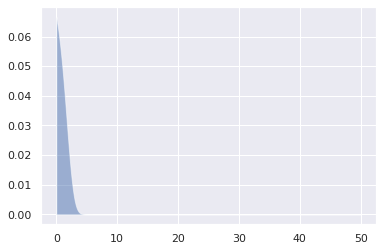

In [14]:
plt.fill_between(x_d, FWD.shape[0]*np.exp(Flogprob)/(NWD.shape[0]*np.exp(Nlogprob)), alpha=0.5,label='Failure Rain 2 days')

In [15]:
ODDS=np.exp(Flogprob)/np.exp(Nlogprob)

/tmp/ipykernel_14140/213753990.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


0.5208789453387849

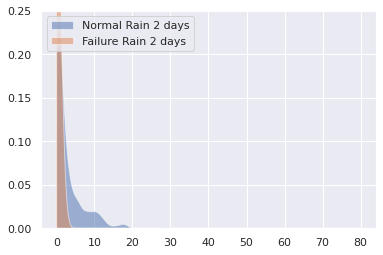

In [16]:
##############
### 3 days ###
##############
dfR=df[df['Rain3']>0]
NWD=dfR['Rain3'].dropna()
Rain =dfR.groupby(['Rain3'])['Failure.Rate'].agg('sum')
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(0, 80, 10000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain 2 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain 2 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.25)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])

/tmp/ipykernel_14140/1669391915.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


0.5467278270653956

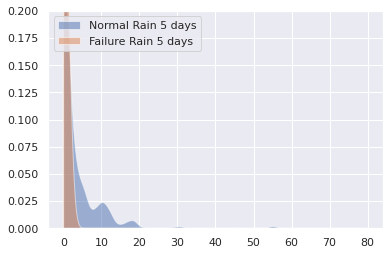

In [17]:
##############
### 5 days ###
##############
dfR=df[df['Rain5']>0]
NWD=dfR.Rain5.dropna()
Rain =dfR.groupby(['Rain5'])['Failure.Rate'].agg('sum')
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(0, 80, 10000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain 5 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain 5 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.2)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])

/tmp/ipykernel_14140/1148498440.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


0.21187009079623778

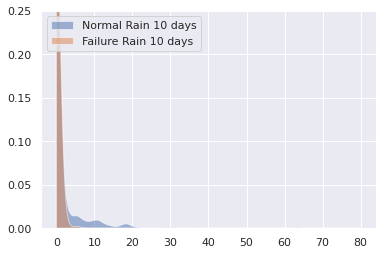

In [18]:
##############
### 10 days ###
##############
dfR=df[df['Rain10']>0]
NWD=df.Rain10.dropna()
Rain =df.groupby(['Rain10'])['Failure.Rate'].agg('sum')
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(0, 80, 10000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain 10 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain 10 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.25)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])

In [19]:
Nlogprob.shape

(10000,)

/tmp/ipykernel_14140/1171768959.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


0.536605081315249

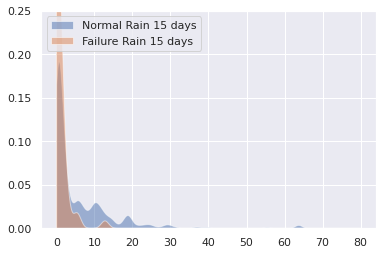

In [20]:
##############
### 15 days ###
##############
dfR=df[df['Rain15']>0]
NWD=dfR.Rain15.dropna()
Rain =dfR.groupby(['Rain15'])['Failure.Rate'].agg('sum')
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(0, 80, 10000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain 15 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain 15 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.25)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])